## Exploration of olympic history data
 - Download the zip all CSVs from here: [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results).
 - Read the [dataset overview](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/home)
 - Use pandas.ipynb from the videos as a reference - https://github.com/justmarkham/pandas-videos/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load athlete_events.csv into a datatrame called `df`

In [3]:
df = pd.read_csv('athlete_events.csv')

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Youngest and oldest participants
Note that the youngest participant was 10 and the oldest 97 ! Find who they are and what sports they cometed in. 
 - hint: read about idxmin() function

In [6]:
print("Oldest: " + str(int(df['Age'].max())) + " years old")
print("Youngest: " + str(int(df['Age'].min())) + " years old")

Oldest: 97 years old
Youngest: 10 years old


### How many unique athletes are listed in the dataset?

In [7]:
df.ID.unique().size

135571

### How many unique athletes got any medals?

In [8]:
df.drop_duplicates('ID').Medal.notnull().sum()

19151

### How many medals of each type were awarded?

In [9]:
df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

### Waht's the newest olympic sport in this dataset?

In [26]:
def getMinYears(group):
    return group.Year.min()

df.groupby("Sport").apply(getMinYears).sort_values(ascending=False).index[0]

'Rugby Sevens'

### What sport had the most participants in the latest summer games?

In [11]:
df.groupby("Sport").apply(lambda group: group.ID.size).sort_values(ascending=False).index[0]
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


### List all the cities that hosted any olympic games more than once

In [299]:
df.groupby('City').apply(lambda group: group.Year.unique()).apply(lambda col: col.size)

City
Albertville               1
Amsterdam                 1
Antwerpen                 1
Athina                    3
Atlanta                   1
Barcelona                 1
Beijing                   1
Berlin                    1
Calgary                   1
Chamonix                  1
Cortina d'Ampezzo         1
Garmisch-Partenkirchen    1
Grenoble                  1
Helsinki                  1
Innsbruck                 2
Lake Placid               2
Lillehammer               1
London                    3
Los Angeles               2
Melbourne                 1
Mexico City               1
Montreal                  1
Moskva                    1
Munich                    1
Nagano                    1
Oslo                      1
Paris                     2
Rio de Janeiro            1
Roma                      1
Salt Lake City            1
Sankt Moritz              2
Sapporo                   1
Sarajevo                  1
Seoul                     1
Sochi                     1
Squaw Valley   

### Plot histograms of Age, Height and Weight of athletes

### Plot the histograms again, but separately for men and women

### Here is an attempt to plot the number of participants as a function of year. What happaned in mid 1990s that makes this graph look so weird? Plot a more useful graph (or several)

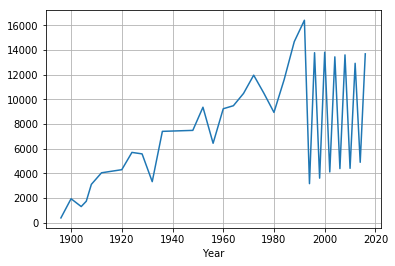

In [61]:
df.groupby(['Year'])['ID'].count().plot()
plt.grid()

### Plot the average height of participants as a function of year - did they grow taller during the last century? (population on average did)

In [126]:
arr = np.array([85, 87, 95, 97, 98])

bucket = []

for i, x in enumerate(arr):
    for y in arr[i + 1:]:
        if(np.abs(x - y) < 10):
            bucket.append(x)
            bucket.append(y)
            
bucket

[85, 87, 87, 95, 95, 97, 95, 98, 97, 98]